<a href="https://colab.research.google.com/github/pri-Mohanty/OneCrop/blob/main/Crop_wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Data preprocessing**



In [ ]:
path = '/content/drive/MyDrive/output_all_farms_wheat.xlsx'
df = pd.read_excel(path)

In [ ]:
df

,Region,farm,mean_soil_depth,year_sowing,cultivar,sowing,anthesis,biomass,yield,irrigation,rain,rain_fallow,N_applied,Tmax,Tmin,Rs,farm production (kg)
0,LOBA,1,1.57,2000,Gen. 1,2000308,2001062,16855,2284,100,641,0,100,18.02864,8.030096,13.62233,47963
1,LOBA,1,1.57,2001,Gen. 1,2001308,2002082,22783,3561,100,445,0,100,17.57524,5.658252,14.53107,74786
2,LOBA,1,1.57,2002,Gen. 1,2002308,2003072,3741,526,100,183,0,100,17.99563,7.088349,13.65145,11043
3,LOBA,1,1.57,2003,Gen. 1,2003308,2004078,23602,3358,100,502,0,100,16.80680,6.843202,13.43253,70525
4,LOBA,1,1.57,2004,Gen. 1,2004308,2005094,12494,1583,100,321,0,100,18.45169,3.957971,15.29855,33253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,CSCS,62,0.67,2015,Gen. 2,2015334,2016082,7243,1480,50,436,0,50,19.64134,7.772623,13.88938,44414
1236,CSCS,62,0.67,2016,Gen. 2,2016334,2017085,14979,3807,50,560,0,50,19.46022,7.769614,14.54862,114217
1237,CSCS,62,0.67,2017,Gen. 2,2017334,2018090,6745,1315,50,237,0,50,19.26171,6.869715,14.21372,39442
1238,CSCS,62,0.67,2018,Gen. 2,2018334,2019087,6072,983,50,525,0,50,19.49167,6.824447,15.22834,29486


In [ ]:
def data_quality_report(df):

    if isinstance(df, pd.core.frame.DataFrame):

        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)

        return data_report

    else:

        return None

# **Data Cleaning and EDA**


In [ ]:
final_dataset = df.drop(['Region', 'farm', 'year_sowing', 'cultivar', 'anthesis', 'N_applied', 'sowing', 'rain_fallow'  ], axis=1)

In [ ]:
final_dataset

,mean_soil_depth,biomass,yield,irrigation,rain,Tmax,Tmin,Rs,farm production (kg)
0,1.57,16855,2284,100,641,18.02864,8.030096,13.62233,47963
1,1.57,22783,3561,100,445,17.57524,5.658252,14.53107,74786
2,1.57,3741,526,100,183,17.99563,7.088349,13.65145,11043
3,1.57,23602,3358,100,502,16.80680,6.843202,13.43253,70525
4,1.57,12494,1583,100,321,18.45169,3.957971,15.29855,33253
...,...,...,...,...,...,...,...,...,...
1235,0.67,7243,1480,50,436,19.64134,7.772623,13.88938,44414
1236,0.67,14979,3807,50,560,19.46022,7.769614,14.54862,114217
1237,0.67,6745,1315,50,237,19.26171,6.869715,14.21372,39442
1238,0.67,6072,983,50,525,19.49167,6.824447,15.22834,29486


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_soil_depth        1240 non-null   float64
 1   biomass                1240 non-null   int64  
 2   yield                  1240 non-null   int64  
 3   irrigation             1240 non-null   int64  
 4   rain                   1240 non-null   int64  
 5   Tmax                   1240 non-null   float64
 6   Tmin                   1240 non-null   float64
 7   Rs                     1240 non-null   float64
 8    farm production (kg)  1240 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 87.3 KB


In [ ]:
final_dataset.isnull().sum()

mean_soil_depth          0
biomass                  0
yield                    0
irrigation               0
rain                     0
Tmax                     0
Tmin                     0
Rs                       0
 farm production (kg)    0
dtype: int64

In [ ]:
#removing spaces in column titles
for col in final_dataset.columns:
  print(col)

mean_soil_depth
biomass
yield
irrigation
rain
Tmax
Tmin
Rs
 farm production (kg)


In [ ]:
final_dataset.rename(columns={" farm production (kg)":"farm_prod"}, inplace=True)

In [ ]:
#Detecting special characters
import re
def detect_special_character(pass_string):
  regex= re.compile('[@_!#$%^&*()<>?/\|}{~:-]')
  if(regex.search(pass_string) == None):
    res = False
  else:
    res = True
  return(res)
for col in final_dataset.columns:
  for i in col:
    if detect_special_character(i)== True:
      spc_char = i
      print(i)
    else:
      continue

_
_
_


**Data visualisations**

In [ ]:
data_quality_report(final_dataset)

,mean_soil_depth,biomass,yield,irrigation,rain,Tmax,Tmin,Rs,farm_prod
count,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0
mean,1.050323,13520.942742,2944.772581,31.451613,478.846774,18.161452,5.565003,14.520003,80645.076613
std,0.330744,5471.228711,1252.136497,33.894237,164.282211,1.335059,1.79664,0.976973,40553.133921
min,0.59,196.0,34.0,0.0,174.0,15.5654,1.072165,12.2799,1344.0
25%,0.79,10076.0,2037.25,0.0,350.0,17.175435,4.092377,13.81276,52148.75
50%,0.955,13691.0,3049.5,50.0,451.0,18.077955,5.863334,14.4381,75670.0
75%,1.41,17605.25,3903.75,50.0,594.0,19.10754,7.01064,15.09086,105691.0
max,1.68,27335.0,5775.0,100.0,974.0,21.86135,9.990183,18.55706,224101.0
Data Type,float64,int64,int64,int64,int64,float64,float64,float64,int64
Missing Values,0,0,0,0,0,0,0,0,0


In [ ]:
corr = final_dataset.corr()
corr

,mean_soil_depth,biomass,yield,irrigation,rain,Tmax,Tmin,Rs,farm_prod
mean_soil_depth,1.000000,0.362023,0.297981,0.453392,0.087897,0.228461,0.248220,-0.004398,0.073153
biomass,0.362023,1.000000,0.811336,0.324160,0.574338,-0.287556,0.210120,-0.446490,0.588230
yield,0.297981,0.811336,1.000000,0.121687,0.426299,-0.134287,0.097397,-0.192126,0.819617
irrigation,0.453392,0.324160,0.121687,1.000000,-0.078471,0.098077,0.347945,-0.186495,-0.224100
rain,0.087897,0.574338,0.426299,-0.078471,1.000000,0.063180,0.499869,-0.417924,0.554971
Tmax,0.228461,-0.287556,-0.134287,0.098077,0.063180,1.000000,0.629417,0.236394,0.046919
Tmin,0.248220,0.210120,0.097397,0.347945,0.499869,0.629417,1.000000,-0.326767,0.164461
Rs,-0.004398,-0.446490,-0.192126,-0.186495,-0.417924,0.236394,-0.326767,1.000000,-0.128824
farm_prod,0.073153,0.588230,0.819617,-0.224100,0.554971,0.046919,0.164461,-0.128824,1.000000


<Axes: >

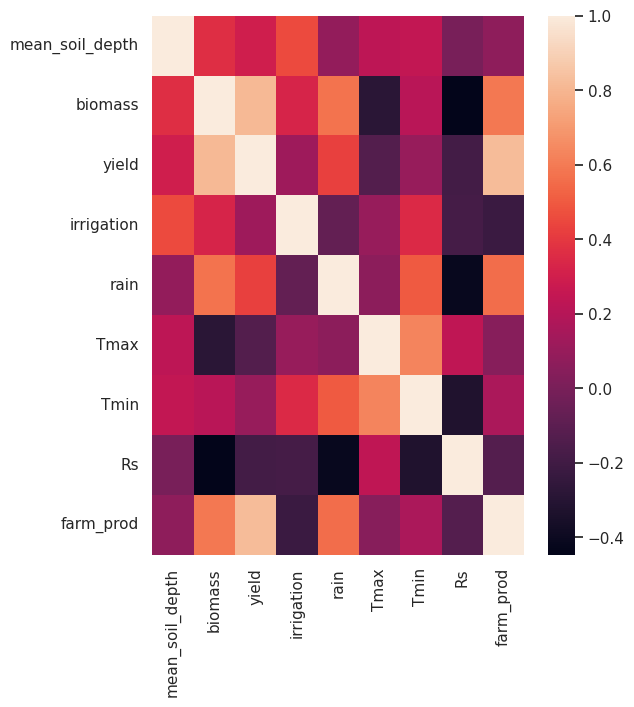

In [ ]:
sns.heatmap(corr)

<Axes: xlabel='Tmax', ylabel='yield'>

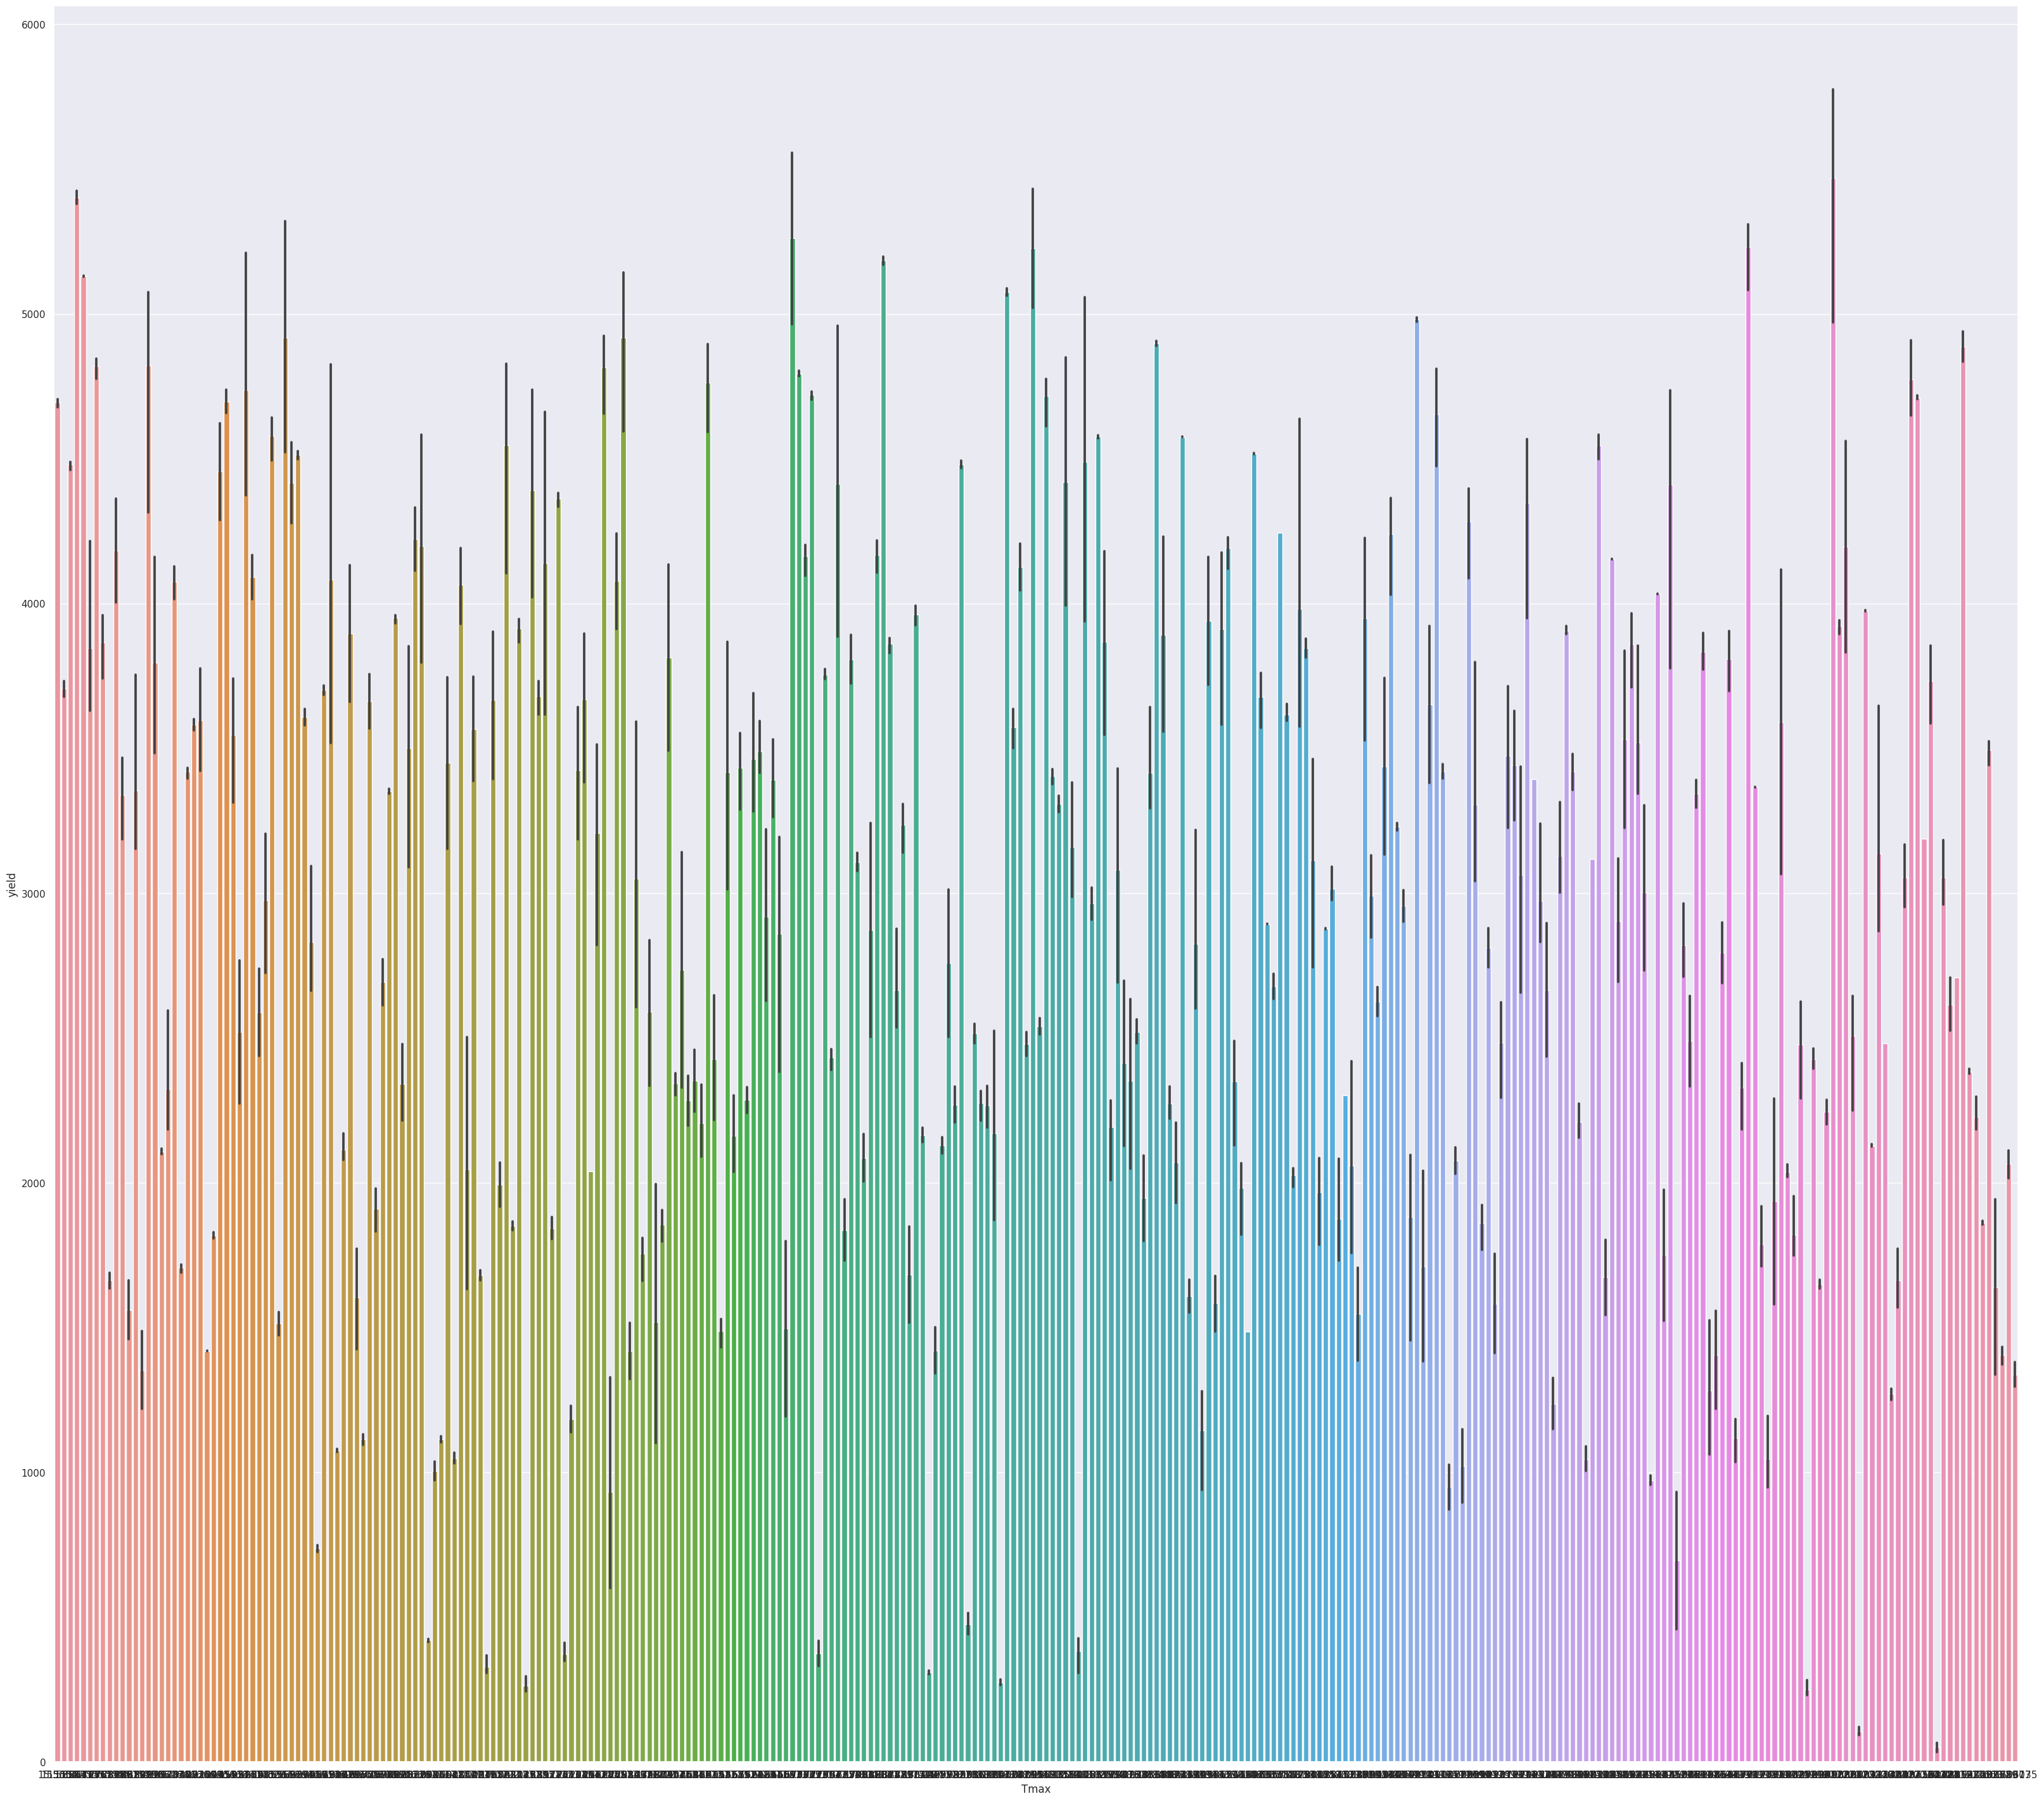

In [ ]:
sns.set(rc={"figure.figsize":(40,36)})
sns.barplot(x="Tmax", y="yield", data=final_dataset)

<Axes: xlabel='Tmax', ylabel='yield'>

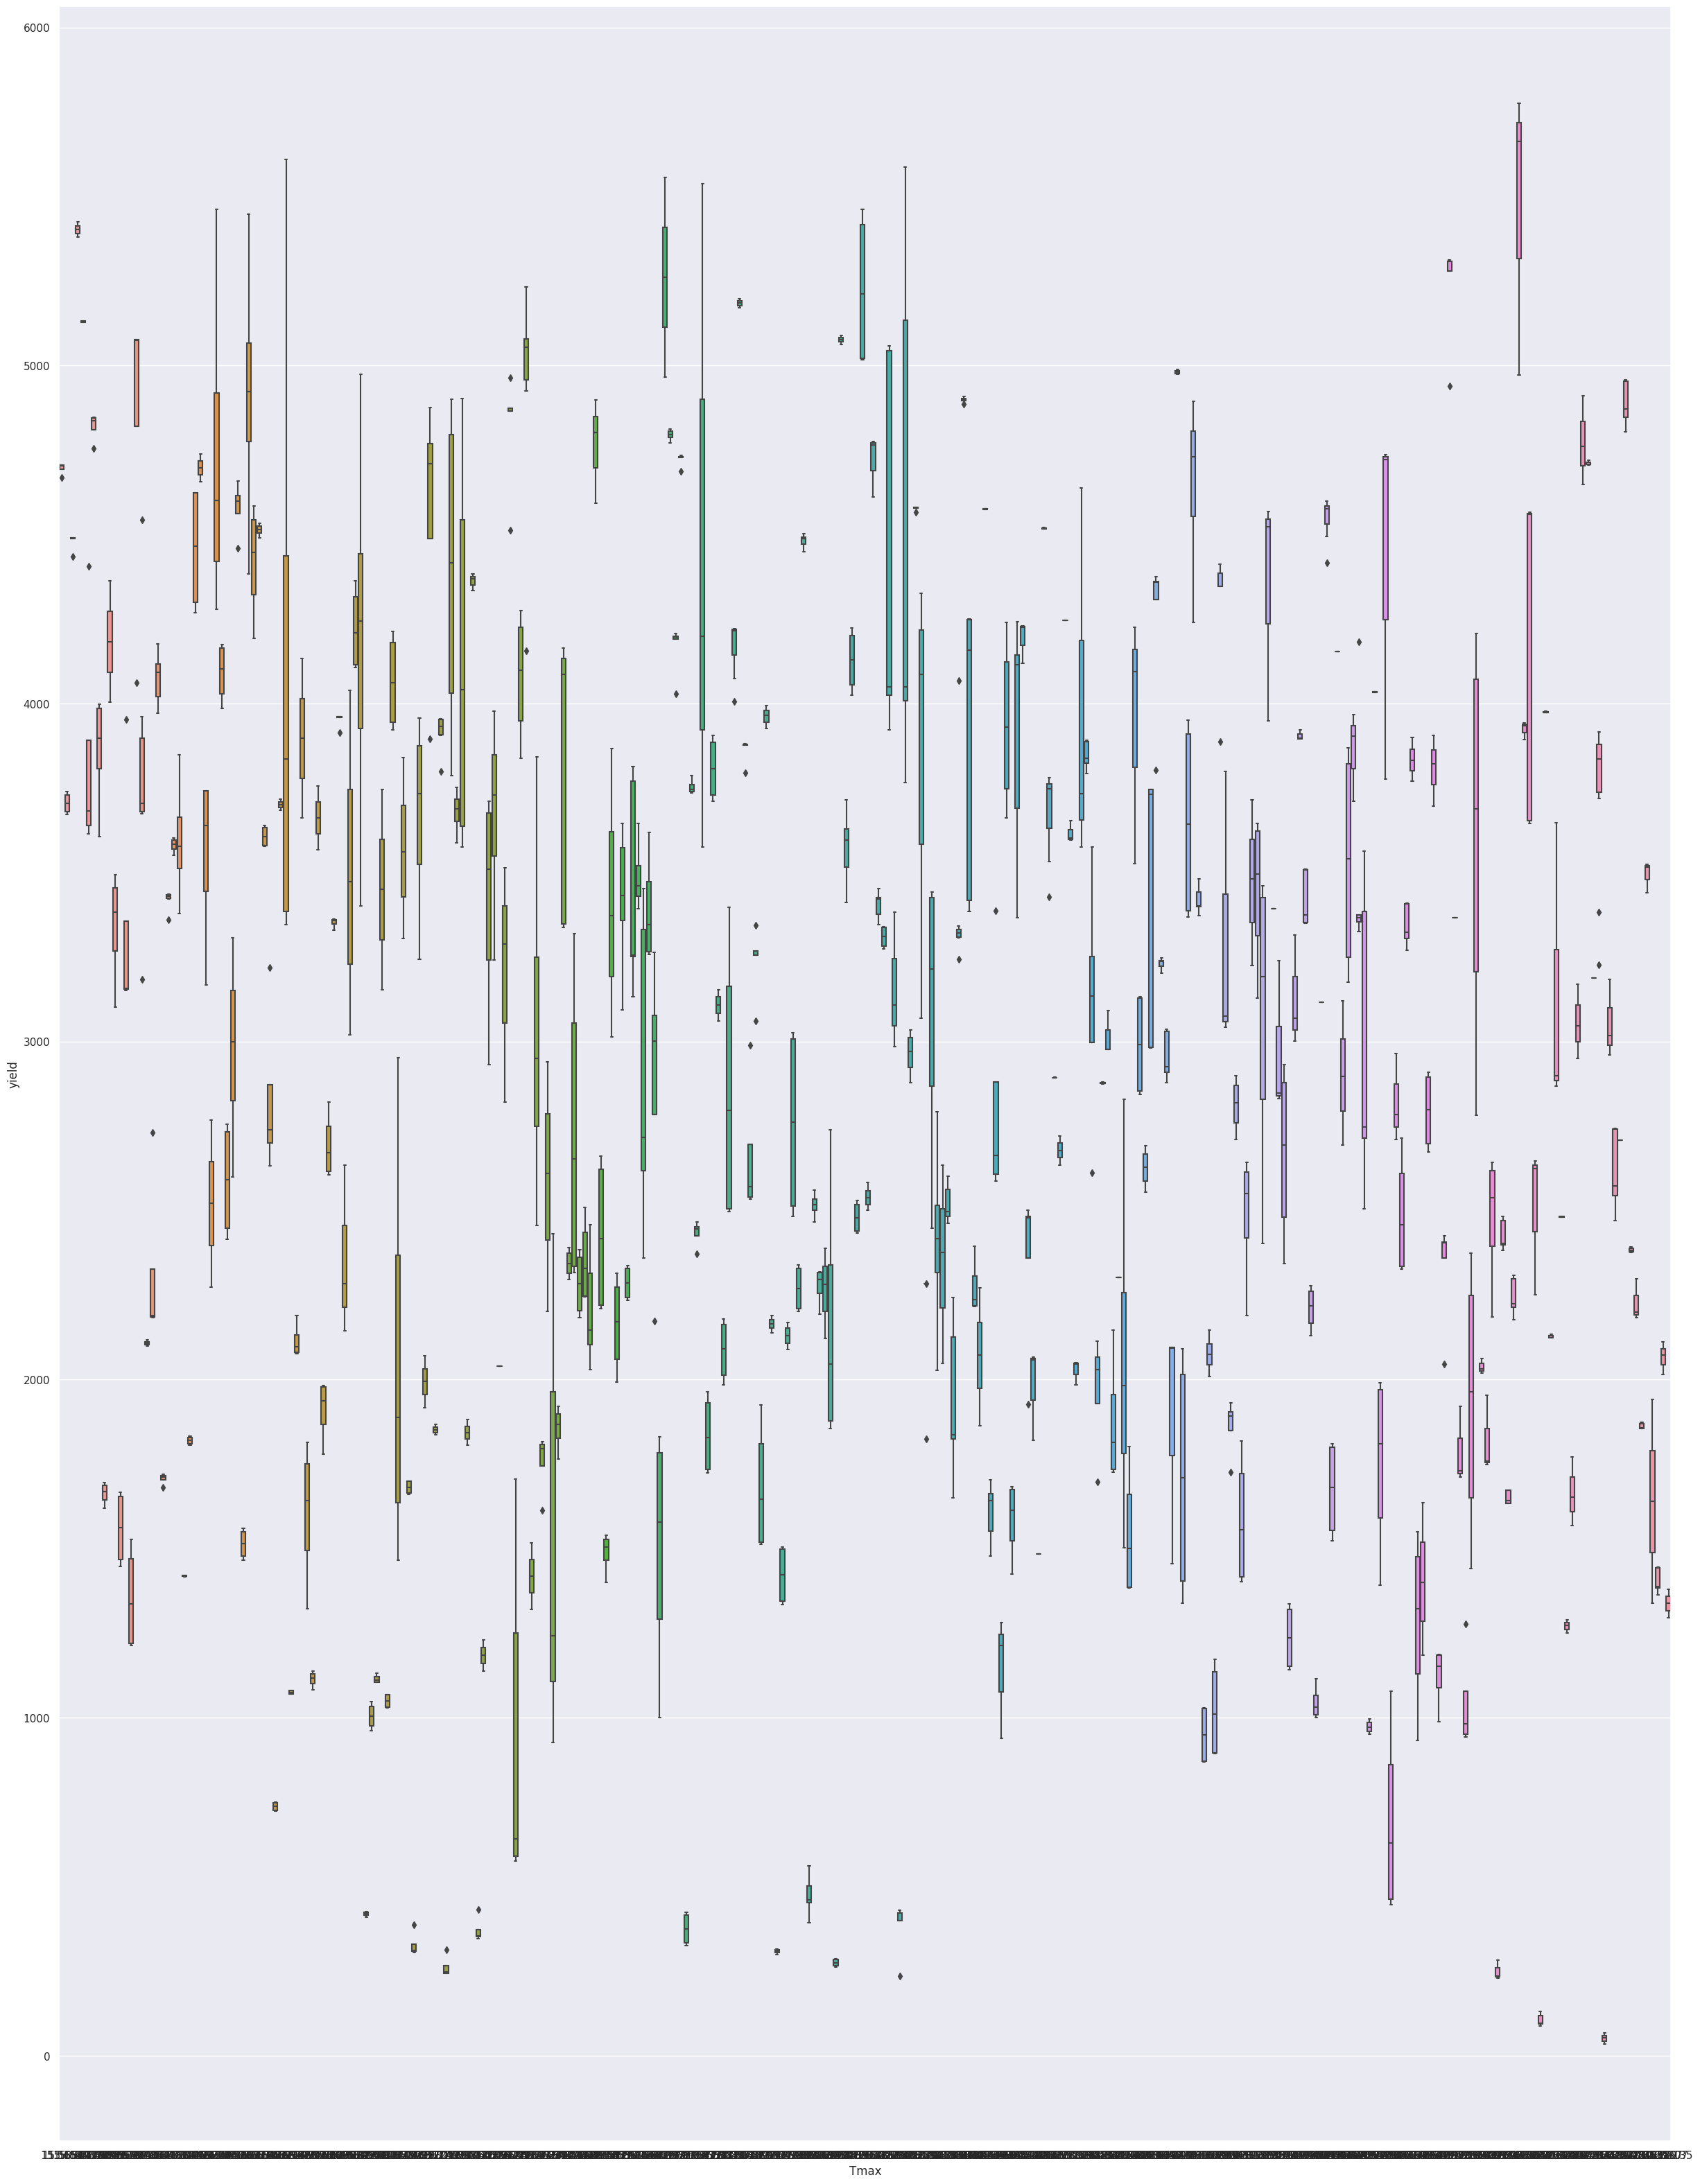

In [ ]:
sns.set(rc={"figure.figsize":(30,40)})
sns.boxplot(x="Tmax", y="yield", data=final_dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop(['yield', "farm_prod", 'Rs', 'biomass'], axis=1)
y = final_dataset[["yield"]]

<Axes: ylabel='Density'>

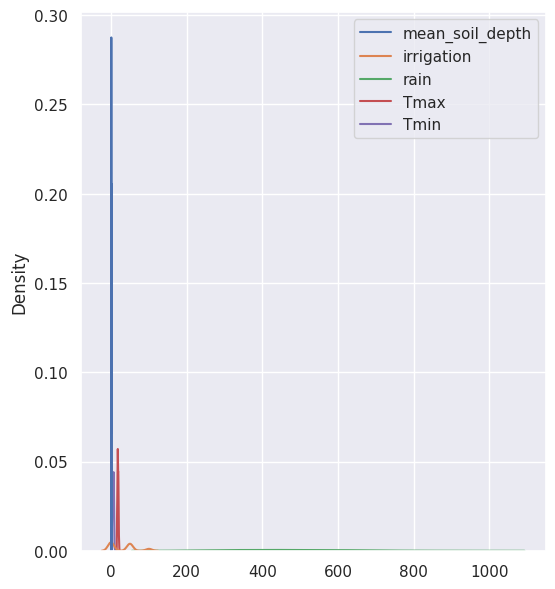

In [ ]:
sns.set(rc={"figure.figsize":(6,7)})
sns.kdeplot(data=X)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

<Axes: ylabel='Density'>

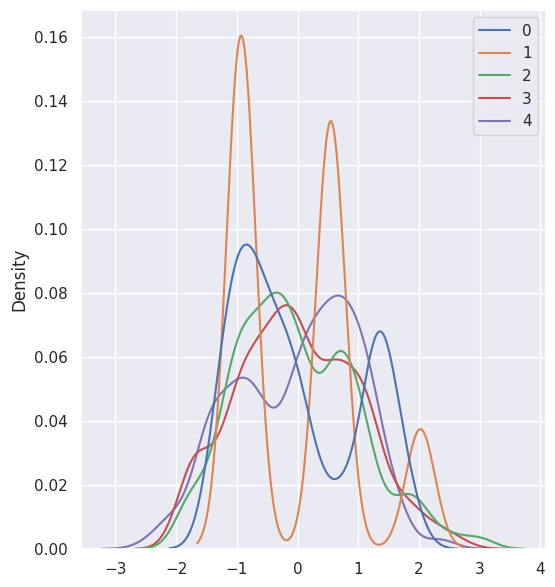

In [ ]:
scaled_X = scaler.transform(X)
sns.kdeplot(data=scaled_X)

<Axes: ylabel='Density'>

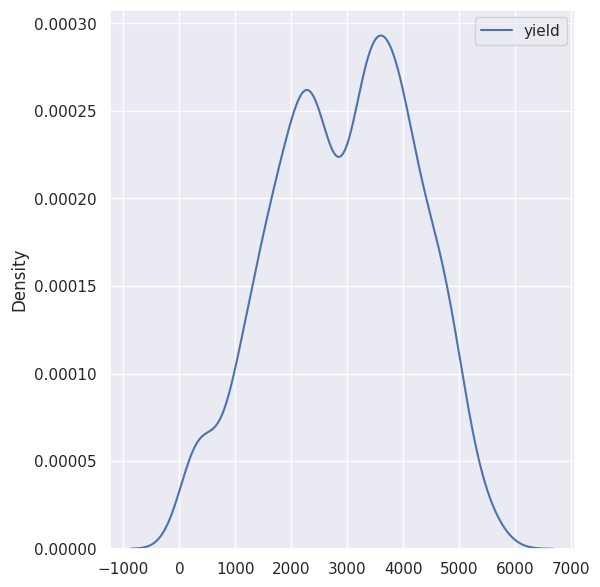

In [ ]:
sns.kdeplot(data = y)

<Axes: ylabel='Density'>

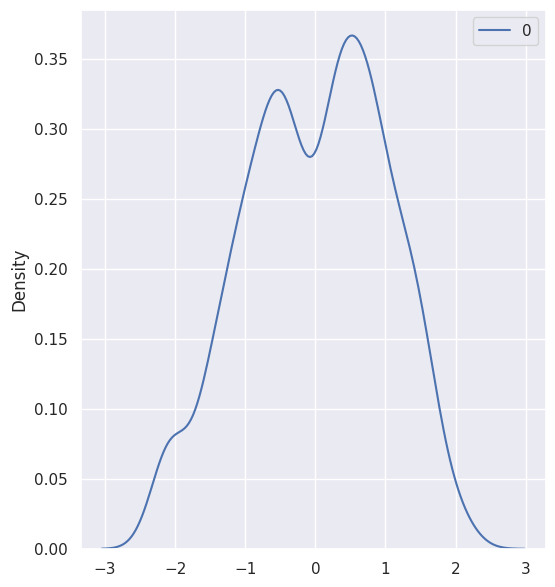

In [ ]:
scaler.fit(y)
scaled_y = scaler.transform(y)
sns.kdeplot(data = scaled_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.25)

**Modeling and hyparameter tuning**

# **Model 1: RandomForests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
X_train

array([[ 1.75335599,  0.54746389, -1.25351264,  0.13050229, -0.68835177],
       [-0.69665897,  0.54746389,  0.18361934,  0.03532202,  1.17377668],
       [ 1.42063791,  0.54746389,  0.35412653,  0.34098243,  0.22302389],
       ...,
       [-0.3034467 , -0.92830834,  0.72558861, -1.5941475 , -0.56852544],
       [-0.69665897,  0.54746389,  2.00439249, -0.80041655,  0.05369525],
       [ 1.08791982,  2.02323613, -0.96121461,  0.58547479, -0.7993269 ]])

In [ ]:
y_test

array([[ 1.11632491],
       [ 0.96691991],
       [-1.28294357],
       [-0.87787226],
       [ 0.25824487],
       [ 1.4039495 ],
       [-0.16759931],
       [ 1.01405839],
       [-1.84860526],
       [ 1.30487881],
       [ 0.29579586],
       [ 0.24785843],
       [-0.61661326],
       [ 0.37569158],
       [-0.17878471],
       [ 0.78076288],
       [-0.51754257],
       [ 1.6763939 ],
       [-0.66455069],
       [ 1.4542838 ],
       [-1.35724659],
       [-1.1758833 ],
       [-0.99052523],
       [ 0.28221359],
       [ 0.1663648 ],
       [ 0.56504444],
       [ 1.00766673],
       [ 1.70116158],
       [-0.98653044],
       [-0.93060344],
       [-0.69411211],
       [-0.44004372],
       [ 1.51979829],
       [-1.5306203 ],
       [-0.03816825],
       [ 0.2055137 ],
       [-1.0264783 ],
       [ 0.38767594],
       [ 0.50352473],
       [ 1.30328089],
       [-0.5598873 ],
       [ 1.33124439],
       [-0.86908374],
       [-0.81874943],
       [ 0.51151431],
       [ 1

In [ ]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomised Search CV
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose = 2, random_state = 42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Predictions and goodness of fit**

In [ ]:
predictions = rf_random.predict(X_test)

In [ ]:
predictions

array([ 0.62311836,  1.20267082, -0.72363837, -0.19721027,  0.46408341,
        1.12785546, -0.30223628,  0.93310916, -1.69120803,  1.07574967,
        0.20104433,  0.43742298, -0.10990342, -0.10536135, -0.16792353,
        0.62208892, -0.05393587,  0.795883  , -0.86540054,  1.09378621,
       -1.05947841, -0.8458181 , -0.96113958,  0.44218426, -0.10817767,
        0.84486375,  0.18478875,  0.39111945, -0.95721191, -0.68623839,
        0.62233606, -0.60636264,  1.23190781, -1.54512936,  0.06128035,
        0.25964624, -1.00334769,  0.53939095,  0.79502853,  0.91244218,
       -0.53916235,  1.05717771, -0.60488297,  0.21237914,  0.26773436,
        1.10520609,  0.39895562,  0.73657336, -0.93205115, -0.79153535,
        0.88716309, -0.12105287,  0.15641219, -0.36427621,  1.44251774,
       -0.50169748, -0.13511611,  0.11100825, -1.34580312, -0.58579109,
        0.76747887, -0.09953455,  0.44146014, -1.94655182, -0.15725801,
        0.22487083,  1.31104756, -0.20439509, -0.44929405,  0.79

<ipython-input-100-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: ylabel='Density'>

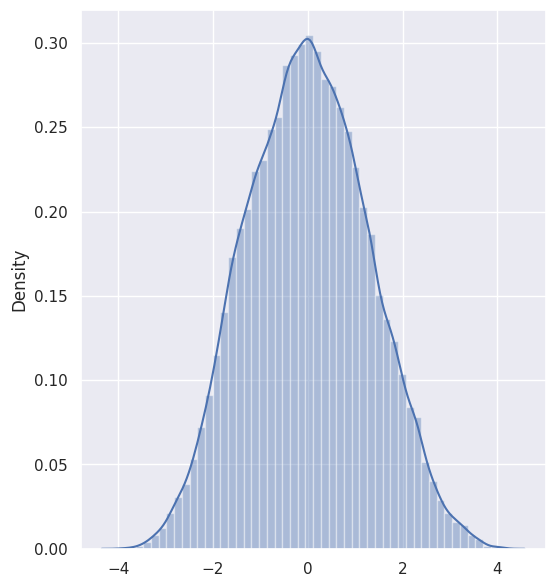

In [ ]:
sns.distplot(y_test-predictions)

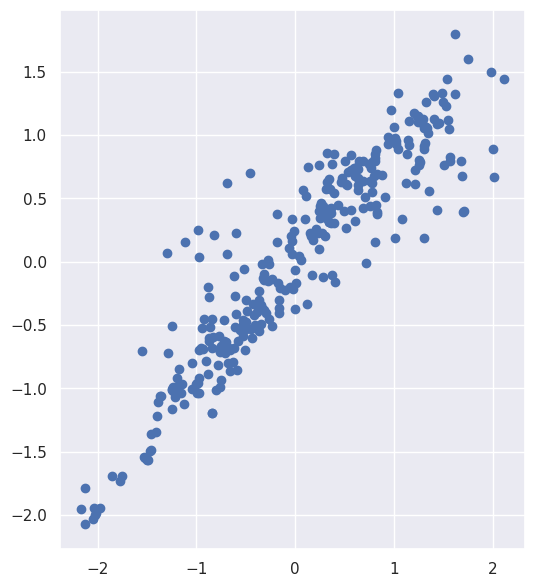

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

0.14094015412410615

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8505252128022639

# **Model 2:Custom GBNN**

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
input_dim = X_train.shape[1]

In [ ]:
from kerastuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Defining a custom HyperModel class
class MyHyperModel(HyperModel):
  def build(self,hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_dim=input_dim))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
hypermodel = MyHyperModel()

In [ ]:
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_directory',
    project_name='my_project'
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 8ms/step - loss: 0.7266 - val_loss: 0.5329
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5662 - val_loss: 0.4658
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5151 - val_loss: 0.4358
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4615 - val_loss: 0.4409
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4390 - val_loss: 0.4156
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4149 - val_loss: 0.4101
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3914 - val_loss: 0.3943
Epoch 8/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3955 - val_loss: 0.3982
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3603 - val_loss: 0.4108
Epoch 10/10
30/30 [==============================] - 0s 6ms/step - loss: 0.3618 - val_loss: 0.3801


In [ ]:
mse = best_model.evaluate(X_test, y_test)
print(mse)

5/5 [==============================] - 0s 3ms/step - loss: 0.4247
0.42465052008628845


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
gbnn_model = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    tree_method='gpu_hist',
    base_score=0.5,
    base_estimator=best_model
)

In [ ]:
gbnn_model.fit(X_train, y_train)

XGBRegressor(base_estimator=<keras.engine.sequential.Sequential object at 0x7f50ea4a4100>,
             base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
y_pred = gbnn_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.1096652071514055


<ipython-input-119-f7d4a70d285b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

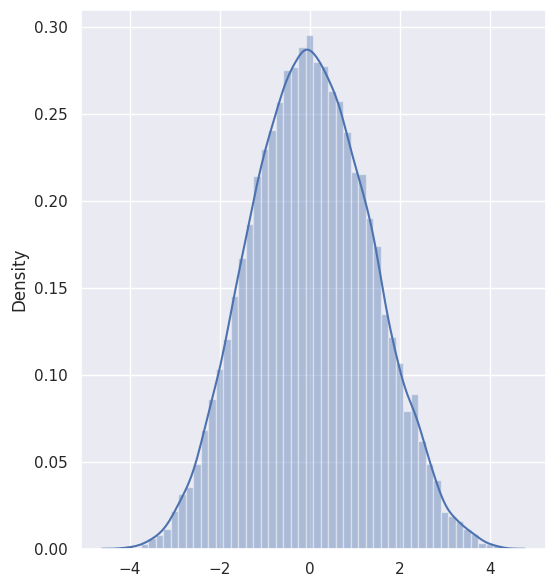

In [ ]:
sns.distplot(y_test-y_pred)

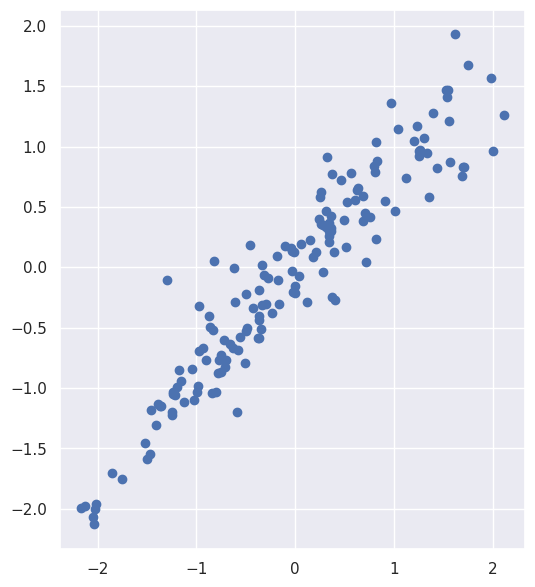

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.890374027046737

In [ ]:
from tensorflow.keras.utils import plot_model

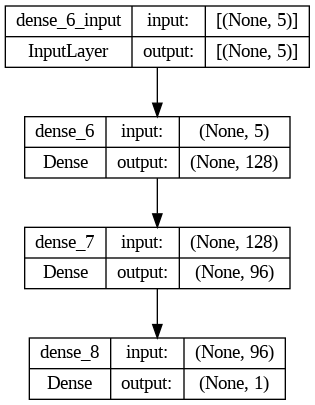

In [ ]:
plot_model(best_model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               768       
                                                                 
 dense_7 (Dense)             (None, 96)                12384     
                                                                 
 dense_8 (Dense)             (None, 1)                 97        
                                                                 
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
_________________________________________________________________
